In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('/content/cyberbullying_tweets.csv.zip')
data.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [13]:
data['tweet_text']=data['tweet_text'].str.lower()

In [14]:
data['tweet_text'] = data['tweet_text'].astype(str).str.replace('[^a-zA-Z0-9\\s]', '', regex=True)
display(data.head())

,tweet_text,cyberbullying_type
0,in other words katandandre your food was crapi...,not_cyberbullying
1,why is aussietv so white mkr theblock imaceleb...,not_cyberbullying
2,xochitlsuckkks a classy whore or more red velv...,not_cyberbullying
3,jasongio meh p thanks for the heads up but no...,not_cyberbullying
4,rudhoeenglish this is an isis account pretendi...,not_cyberbullying


In [15]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
data['tweet_text'] = data['tweet_text'].apply(word_tokenize)
display(data.head())

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,tweet_text,cyberbullying_type
0,"[in, other, words, katandandre, your, food, wa...",not_cyberbullying
1,"[why, is, aussietv, so, white, mkr, theblock, ...",not_cyberbullying
2,"[xochitlsuckkks, a, classy, whore, or, more, r...",not_cyberbullying
3,"[jasongio, meh, p, thanks, for, the, heads, up...",not_cyberbullying
4,"[rudhoeenglish, this, is, an, isis, account, p...",not_cyberbullying


In [16]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
data['tweet_text'] = data['tweet_text'].apply(lambda x: [word for word in x if word not in stop_words])
display(data.head())

,tweet_text,cyberbullying_type
0,"[words, katandandre, food, crapilicious, mkr]",not_cyberbullying
1,"[aussietv, white, mkr, theblock, imacelebritya...",not_cyberbullying
2,"[xochitlsuckkks, classy, whore, red, velvet, c...",not_cyberbullying
3,"[jasongio, meh, p, thanks, heads, concerned, a...",not_cyberbullying
4,"[rudhoeenglish, isis, account, pretending, kur...",not_cyberbullying


In [18]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('wordnet')

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [26]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('wordnet')

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

data['tweet_text'] = data['tweet_text'].apply(lambda x: [stemmer.stem(word) for word in x])
data['tweet_text'] = data['tweet_text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
# Join the list of words back into a string
data['tweet_text'] = data['tweet_text'].apply(lambda x: ' '.join(x))
display(data.head())

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,tweet_text,cyberbullying_type,bullying
0,word katandandr food crapilici mkr,not_cyberbullying,1
1,aussietv white mkr theblock imacelebrityau tod...,not_cyberbullying,1
2,xochitlsuckkk classi whore red velvet cupcak,not_cyberbullying,1
3,jasongio meh p thank head concern anoth angri ...,not_cyberbullying,1
4,rudhoeenglish isi account pretend kurdish acco...,not_cyberbullying,1


In [20]:
data['bullying']=data['cyberbullying_type'].apply(lambda x: 1 if x=='not_cyberbullying' else 0)

In [21]:
data.head()

,tweet_text,cyberbullying_type,bullying
0,"[word, katandandr, food, crapilici, mkr]",not_cyberbullying,1
1,"[aussietv, white, mkr, theblock, imacelebritya...",not_cyberbullying,1
2,"[xochitlsuckkk, classi, whore, red, velvet, cu...",not_cyberbullying,1
3,"[jasongio, meh, p, thank, head, concern, anoth...",not_cyberbullying,1
4,"[rudhoeenglish, isi, account, pretend, kurdish...",not_cyberbullying,1


In [22]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['tweet_text'].apply(lambda x: ' '.join(x)))

In [23]:
data.head()

,tweet_text,cyberbullying_type,bullying
0,"[word, katandandr, food, crapilici, mkr]",not_cyberbullying,1
1,"[aussietv, white, mkr, theblock, imacelebritya...",not_cyberbullying,1
2,"[xochitlsuckkk, classi, whore, red, velvet, cu...",not_cyberbullying,1
3,"[jasongio, meh, p, thank, head, concern, anoth...",not_cyberbullying,1
4,"[rudhoeenglish, isi, account, pretend, kurdish...",not_cyberbullying,1


In [33]:
vectorizer.vocabulary_

{'word': 53616,
 'katandandr': 28556,
 'food': 16405,
 'crapilici': 10731,
 'mkr': 33685,
 'aussietv': 4355,
 'white': 53103,
 'theblock': 48732,
 'imacelebrityau': 25349,
 'today': 49683,
 'sunris': 47336,
 'studio10': 47041,
 'neighbour': 35349,
 'wonderlandten': 53568,
 'etc': 14800,
 'xochitlsuckkk': 54018,
 'classi': 9500,
 'whore': 53188,
 'red': 41479,
 'velvet': 51865,
 'cupcak': 11095,
 'jasongio': 26985,
 'meh': 32805,
 'thank': 48592,
 'head': 19610,
 'concern': 10106,
 'anoth': 3337,
 'angri': 3213,
 'dude': 13627,
 'twitter': 50730,
 'rudhoeenglish': 42814,
 'isi': 26233,
 'account': 1654,
 'pretend': 39790,
 'kurdish': 29621,
 'like': 30594,
 'islam': 26272,
 'lie': 30519,
 'raja5aab': 40917,
 'quickieleak': 40618,
 'ye': 54194,
 'test': 48512,
 'god': 18141,
 'good': 18260,
 'bad': 4724,
 'indiffer': 25664,
 'weird': 52814,
 'whatev': 53007,
 'prove': 40132,
 'exist': 15076,
 'itu': 26571,
 'sekolah': 44070,
 'ya': 54079,
 'bukan': 7425,
 'tempat': 48323,
 'bulli': 7449,

/tmp/ipython-input-2876468115.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score', y='word', data=top_words_df, palette='viridis')


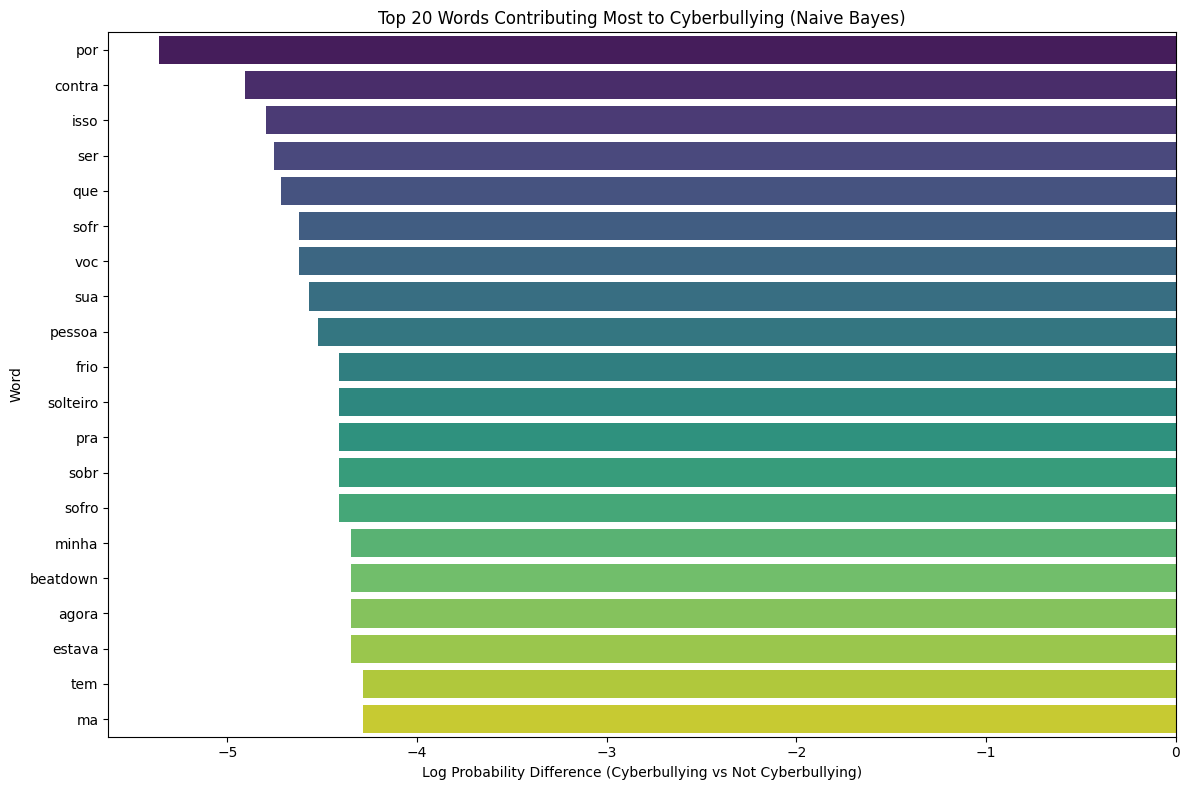

In [35]:
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns

naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train, y_train)

y_pred_nb = naive_bayes_model.predict(X_test)


feature_names = vectorizer.get_feature_names_out()

log_prob = naive_bayes_model.feature_log_prob_

log_prob_cyberbullying = log_prob[0]
log_prob_not_cyberbullying = log_prob[1]


log_prob_difference = log_prob_cyberbullying - log_prob_not_cyberbullying


top_cyberbullying_indices = log_prob_difference.argsort()[:20]


top_cyberbullying_words = [feature_names[i] for i in top_cyberbullying_indices]
top_cyberbullying_scores = [log_prob_difference[i] for i in top_cyberbullying_indices]


top_words_df = pd.DataFrame({'word': top_cyberbullying_words, 'score': top_cyberbullying_scores})
top_words_df = top_words_df.sort_values(by='score', ascending=True)


plt.figure(figsize=(12, 8))
sns.barplot(x='score', y='word', data=top_words_df, palette='viridis')
plt.title('Top 20 Words Contributing Most to Cyberbullying (Naive Bayes)')
plt.xlabel('Log Probability Difference (Cyberbullying vs Not Cyberbullying)')
plt.ylabel('Word')
plt.tight_layout()
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, data['bullying'], test_size=0.2, random_state=42)

In [27]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

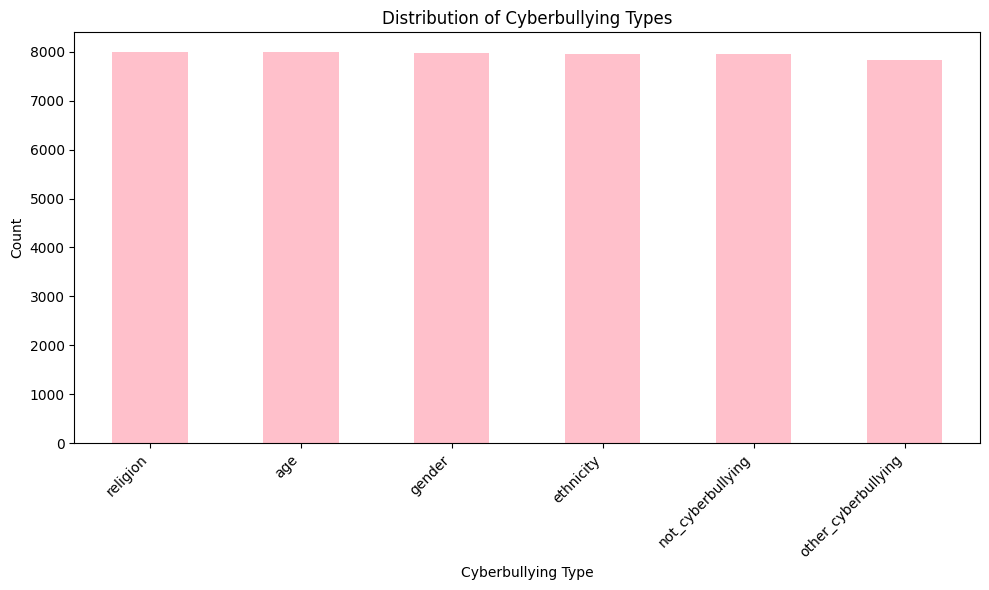

In [31]:
cyberbullying_counts = data['cyberbullying_type'].value_counts()

plt.figure(figsize=(10, 6))
cyberbullying_counts.plot(kind='bar',color='pink')
plt.title('Distribution of Cyberbullying Types')
plt.xlabel('Cyberbullying Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **NOTE: Cyberbullying is a pervasive cybercrime that compromises personal safety and data security. Malicious actors use harmful language to target individuals, often leading to data breaches, reputational damage, and the loss of sensitive information. This project leverages Natural Language Processing (NLP) to proactively identify cyberbullying in digital communications, aiming to protect users and secure vital data.**